# ラビットチャレンジ/科目「機械学習」/「線形回帰モデル」  

## 100文字以上で要点のまとめ  

・回帰問題を解くための機械学習モデルの一つ  
　回帰問題とは、ある入力（離散or連続）から出力（連続値）を予測する問題である。線形回帰は直線で予測する。  
・教師あり学習  
　人間があらかじめ容易した正解データをもとにモデルを構築  
・入力と$m$次元パラメータの線形結合を出力するモデル  
　慣例として予測値にはハットを付ける（正解データとは異なる)  
・入力の各要素を、説明変数または特徴量といい、m次元のベクトル(m=1の場合はスカラー)で表現する。出力のことを、目的変数といい、スカラー値で表現する。  
・説明変数が多次元の場合を重回帰、1次元の場合を単回帰という。  
　説明変数が2次元以下、目的変数1次元の場合はmatplotlibやseaborn等のライブラリを用いて可視化できるが、それ以上は合計4次元以上となるため可視化できない。  
・入力ベクトルと未知のパラメータの内積（線形結合）と切片の加算により、モデルが構成される。  
$$
\hat{y} = \boldsymbol{w^{T}x} + w_0 = \Sigma_{j=1}^m w_jx_j+w_0
$$
・ 未知の重みパラメータである$w$を学習する。重みパラメータは、特徴量が予測値に対してどのように影響を与えるかを決定する。  
・ 線形回帰モデルのパラメータは最小二乗法で推定する。学習データの平均二乗誤差(mean_squared_error)を最小とするパラメータを探索する。　
・学習データの平均二乗誤差の最小化はその勾配が0になる点を求めれば良い。  
・誤差をガウス分布に従う確率変数を仮定し尤度関数の最大化を推定した推定も可能。  
・線形回帰では、最尤法による解と最小二乗法による解は一致する。  

## 実装演習
Bostonデータセットを用いる。データセットは506個、各入力（行方向）は13個の特徴量からなる。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 単回帰分析
問題：部屋数（RM)が5の物件はいくらになるか？

In [2]:
mask = list(map(lambda x: x in ['RM'], boston.feature_names))
X = boston.data[:, mask]
# train/test分離
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# モデルの定義
from sklearn import linear_model
reg = linear_model.LinearRegression()
# 学習
reg.fit(X_train, y_train)
# 予測
reg.predict([[5]])

array([10.40573194])

予想価格( Median value of owner-occupied homes in $1000's)は`10.4`となった。

In [3]:
# 単回帰の回帰係数と切片を出力
print("coef_: {}".format(reg.coef_))
print("intercept_: {}".format(reg.intercept_))

coef_: [9.37638431]
intercept_: -36.476189627647315


## 重回帰分析
問題：築年数10年で部屋数（RM)が5で犯罪率(CRIM)が0.03の物件はいくらになるか？

In [4]:
mask2 = list(map(lambda x: x in ['CRIM','RM','AGE'], boston.feature_names))
X = boston.data[:, mask2]
# train/test分離
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# モデルの定義
from sklearn import linear_model
reg2 = linear_model.LinearRegression()
# 学習
reg2.fit(X_train, y_train)
# 予測
reg2.predict([[0.03,5,10]])

array([16.23106862])

予想価格( Median value of owner-occupied homes in $1000's)は`12.45`となった。

In [5]:
print("coef_: {}".format(reg2.coef_))
print("intercept_: {}".format(reg2.intercept_))

coef_: [-0.26256086  8.16676468 -0.05708244]
intercept_: -24.02405356920702


## 演習課題
・設定
　ボストンの住宅データセットを線形回帰モデルで分析
  適切な査定結果が必要
　高すぎても安すぎても会社に損害がある
・課題
　部屋数が4で犯罪率が0.3の物件はいくらになるか？

In [6]:
mask3 = list(map(lambda x: x in ['CRIM','RM'], boston.feature_names))
X = boston.data[:, mask3]
# train/test分離
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# モデルの定義
from sklearn import linear_model
reg3 = linear_model.LinearRegression()
# 学習
reg3.fit(X_train, y_train)
# 予測
reg3.predict([[0.3,4]])

array([3.72851066])

予想価格( Median value of owner-occupied homes in $1000's)は`3.7`となった。

In [7]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV']= boston.target
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
X = df[["CRIM","RM"]]
y = df[["MEDV"]]

display(X.head())
display(y.head())

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,CRIM,RM
141,1.62864,5.019
272,0.11460,6.538
135,0.55778,6.335
298,0.06466,6.345
122,0.09299,5.961


152


,CRIM,RM
329,0.06724,6.333
371,9.23230,6.216
219,0.11425,6.373
403,24.80170,5.349
78,0.05646,6.232


データのスケーリング（標準化）を行う。重回帰のような複数の説明変数を扱う線形系アルゴリズムには正しく学習させるために用いる。

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])

[[-0.20735619 -1.83936729]
 [-0.38886492  0.32748658]
 [-0.33573486  0.03790703]]
[[-0.39454262  0.03505403]
 [ 0.70419882 -0.1318465 ]
 [-0.38890688  0.09211404]]


In [11]:
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression().fit(X_train_scaled,y_train)
y_train_pred = multi_reg.predict(X_train_scaled)
y_test_pred = multi_reg.predict(X_test_scaled)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[12.08524405]
 [25.67858515]
 [23.7917699 ]
 [24.02207345]
 [20.68900001]]
152
[[23.91742099]
 [20.23323489]
 [24.250055  ]
 [ 8.18872185]
 [23.04606677]]


モデルの精度はさておき、ひとまず問題なく結果が出力できた。

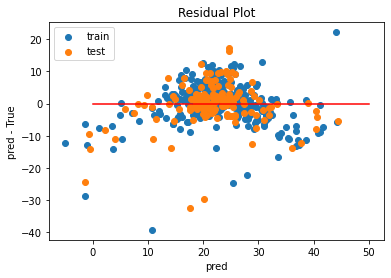

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def residual_plot(y_train_pred,y_train, y_test_pred,y_test):
  plt.scatter(y_train_pred,y_train_pred-y_train,label="train")
  plt.scatter(y_test_pred,y_test_pred-y_test,label="test")
  plt.plot([0,50],[0,0],color="red")
  plt.xlabel("pred")
  plt.ylabel("pred - True")
  plt.title("Residual Plot")
  plt.legend()
  plt.show()
    
residual_plot(y_train_pred, y_train, y_test_pred, y_test)

残差プロットを見る限り密集部分の範囲は±15ぐらいか。

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

def get_eval_score(y_true,y_pred):
    
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_true,y_pred)
    
    print(f" MAE = {mae}")
    print(f" MSE = {mse}")
    print(f" RMSE = {rmse}")
    print(f" R2 = {r2score}")
    
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
 MAE = 4.127568287020748
 MSE = 36.45689467993106
 RMSE = 6.037954511250566
 R2 = 0.5699038054072436
テストデータスコア
 MAE = 4.286923647263356
 MSE = 44.18424117654308
 RMSE = 6.6471227742943855
 R2 = 0.4693571730935949


訓練データもテストデータもスコアが低い。最後に各説明変数の重みと切片を確認する。

In [14]:
for i, (col, coef) in enumerate(zip(X_train_scaled,multi_reg.coef_[0])):
    print(f"w{i}({col}) = {coef}")
print(f"b = {multi_reg.intercept_[0]}")

w0([-0.20735619 -1.83936729]) = -2.4311052078406146
w1([-0.38886492  0.32748658]) = 6.069663689303834
b = 22.745480225988704


$y=-2.4x_1+6x_2+22$  
これに$x_1=0.3,x_2=4$を代入すると  
予想価格( Median value of owner-occupied homes in $1000's)は`45.2`となった。

## 課題の考察
結果は標準化なしの場合も標準化ありの場合もどちらも良くはなかった。`RM`の寄与度が非常に高く、`CRIM`の寄与度が非常に低いことから、単純な重回帰分析では上手く住宅価格を割り出すことはできない。Lasso回帰もRidge回帰も試みたが、上手くいかなかった。決定木やランダムフォレストモデルを用いた方が上手くいくのかもしれない。  
13個あるはずの特徴量を2個しか使わなかったため，モデルの表現力が不足していたのかもしれない。特徴量エンジニアリングで  
` y = mglearn.datasets.load_extended_boston()`とし、特徴量を増やすなど工夫が必要だったのかもしれない。  
それ以上に、`LSTAT`など他の説明変数の中で目的変数と相関が強いカラムがあったため、そちらを採用できたら良かったのかもしれない。  
結論としては、私が上記設定で課題の住宅販売の担当者であるならばこれだけのデータではまともな価格は出せないので、他のカラムのデータを沢山集めることをまずは提言したい。

# ラビットチャレンジ/科目「機械学習」/「非線形回帰モデル」  

## 100文字以上で要点のまとめ  

・非線形回帰
$$
y = w_0 + w_1・x + w_2 ・x^2 + w_3・x^3　\\
y = w_0 + w_1・\sin x + w_2・\cos x + w_3・\log x  \\
$$
  xの代わりに$\phi(x)$を用いる。(xの関数は任意)    
  ただしパラメータwに関しては線形と同じ。

・基底展開法  
　回帰関数として、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線形結合を使用  
  未知パラメータは線形回帰モデルと同様に最小二乗法や最尤法により推定

$$
　y_i = w_0 + \sum_{j=1}^m w_j\phi  j(x_i) + \varepsilon_i
$$


・よく使われる基底関数   
・多項式関数：$$\Phi_j = x^j$$  
・ガウス型基底関数：$$\Phi_j(x) = \exp \biggl(\dfrac{(x-\mu_j)^2}{2h_j}\biggl)$$
　データ点が近いほど情報の影響を強く受ける。離れるにしたがい情報の影響は弱まる。  
　データが十分に存在する場所は分散が小さくなり、データが少ない場所では分散が大きくなる。  
　線形回帰モデルを無限次元に拡張できる。  
　計算量が膨大になるのでカーネル行列の計算量を減らす工夫が必要。  
・スプライン関数/Bスプライン関数    
　基底展開法も線形回帰と同じ枠組みで推定可能  
  
・未学習(underfitting)と過学習(overfitting)  
　学習データに対して、十分小さな誤差が得られていないモデルは未学習であると推測できる。  
　小さな誤差は得られたけど、テスト（検証）誤差との差が大きいモデルは過学習であると推定出来る。  
　過学習を抑制するための対策は以下の３点。  
 ①学習データの数を増やす  
 ②不要な基底関数を削除して表現力を抑止  
 ③正則化法を利用して表現力を抑止  
　学習データの数を増やす、不要な基底関数を削除する、はそれぞれデータの増加、モデルの表現力を下げることにより学習データへのオーバーフィッティング（過学習）を抑える手法。  
  正則化法は、損失関数に制約をかける（重みパラメータのL1ノルム(lasso)やL2ノルム(Ridge)を加える）ことで過学習を抑える手法。 
  
　上記①〜③を駆使して汎化しているモデルを目指す。
  
・ホールドアウト法は、有限のデータを学習用と検証用の2つに分割し、「予測精度」や「誤り率」を求め、推定するために使用。手元にデータが大量にある場合を除いて、良い性能評価を与えないという欠点がある。  
  
・クロスバリデーション（交差検証）は、データを複数に分割しグループに対して、学習用、検証用を入れ替えていくことで、各モデルの精度を計測する手法。精度の平均をCV値と呼ぶ。
  
・グリッドサーチは学習モデルに用いられるハイパーパラメータを調整していき、モデルの汎化性能を向上させる方法を探す代表的な手法。

## 実装演習
先ほどと同じくBostonデータセットを用いる。

## 非線形回帰分析
　問題：人口あたり地位が低い率（LSTAT)が5の物件はいくらになるか？

In [15]:
import numpy as np 
import pandas as pd 

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

In [16]:
# データ準備
x = df["LSTAT"]
X = np.array(x).reshape(-1, 1)
y = df["MEDV"]
# 訓練用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# 非線形モデルの作成
pf = PolynomialFeatures(degree=2, include_bias=False)# 二次元の特徴量を作成
X_train_2 = pf.fit_transform(X_train)
X_test_2 = pf.fit_transform(X_test)
print("LSTAT:")
print(X_train[:5])
print("LSTAT^2: ")
print(X_train_2[:5])

LSTAT:
[[ 9.71]
 [ 9.88]
 [11.38]
 [12.43]
 [26.64]]
LSTAT^2: 
[[  9.71    94.2841]
 [  9.88    97.6144]
 [ 11.38   129.5044]
 [ 12.43   154.5049]
 [ 26.64   709.6896]]


In [18]:
# モデル作成
lm = LinearRegression()
lm.fit(X_train_2, y_train)

LinearRegression()

In [19]:
# パラメタ表示
print("coef_: {}".format(lm.coef_))
print("intercept_: {}".format(lm.intercept_))

coef_: [-2.36696305  0.04463347]
intercept_: 43.109009200262854


In [20]:
# 非線形回帰(2次)モデル精度表示
print("訓練データスコア : {}" .format(lm.score(X_train_2, y_train)))
print("テストデータスコア : {}" .format(lm.score(X_test_2, y_test)))

訓練データスコア : 0.668922472964889
テストデータスコア : 0.5229324163738782


In [21]:
# モデル作成
tmp = LinearRegression()
tmp.fit(X_train, y_train)
y_pred_tmp = tmp.predict(X_test)

In [22]:
# 単回帰モデル精度表示
print("訓練データスコア : {}" .format(tmp.score(X_train, y_train)))
print("テストデータスコア : {}" .format(tmp.score(X_test, y_test)))

訓練データスコア : 0.571031588576562
テストデータスコア : 0.43095672846187605


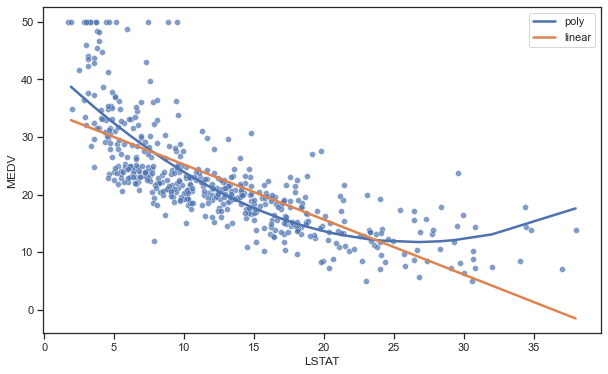

In [23]:
# 学習結果
X_test_a = np.array([np.sort(X_test[:, 0])]).reshape(len(X_test), 1)
X_test_2 = pf.fit_transform(X_test_a)
y_pred = lm.predict(X_test_2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.reshape(len(X), ),y=y, alpha=0.7)
sns.lineplot(x=X_test_a.reshape(len(X_test_a), ), y=y_pred, linewidth=2.5, label='poly')
sns.lineplot(x=X_test.reshape(len(X_test), ), y=y_pred_tmp, linewidth=2.5, label='linear')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [24]:
pf2 = PolynomialFeatures(degree=10, include_bias=False)# 10次元の特徴量を作成
X_train_10 = pf2.fit_transform(X_train)
X_test_10 = pf2.fit_transform(X_test)
# モデル作成
lm2 = LinearRegression()
lm2.fit(X_train_10, y_train)
# パラメタ表示
print("coef_: {}".format(lm2.coef_))
print("intercept_: {}".format(lm2.intercept_))

coef_: [-1.67616065e+00 -3.68987319e+00  1.14655842e+00 -1.72093879e-01
  1.55994175e-02 -9.07728515e-04  3.40492316e-05 -7.93448312e-07
  1.04165907e-08 -5.87223603e-11]
intercept_: 59.775905004852596


In [25]:
# 非線形回帰(10次)モデル精度表示
print("訓練データスコア : {}" .format(lm2.score(X_train_10, y_train)))
print("テストデータスコア : {}" .format(lm2.score(X_test_10, y_test)))

訓練データスコア : 0.7087197122161163
テストデータスコア : 0.48441448182861724


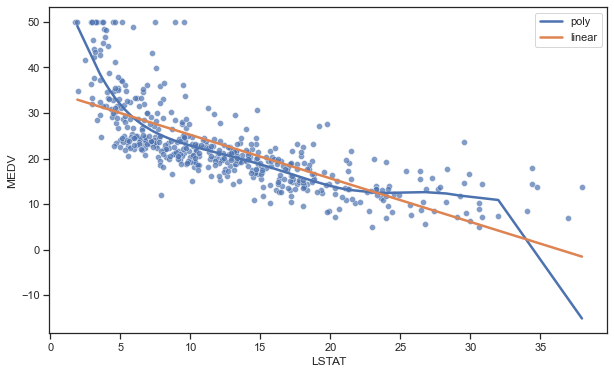

In [26]:
# 学習結果
X_test_a = np.array([np.sort(X_test[:, 0])]).reshape(len(X_test), 1)
X_test_10 = pf2.fit_transform(X_test_a)
y_pred = lm2.predict(X_test_10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.reshape(len(X), ),y=y, alpha=0.7)
sns.lineplot(x=X_test_a.reshape(len(X_test_a), ), y=y_pred, linewidth=2.5, label='poly')
sns.lineplot(x=X_test.reshape(len(X_test), ), y=y_pred_tmp, linewidth=2.5, label='linear')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()


## 課題の考察

今回は2次と10次の多項式回帰を試してみた。  
テストスコアは2次の時の方が良かった。10次は過学習と思われる。`MDEV`がマイナスになっている。ちなみに20次にしたらテストスコアはマイナスになった。
多項式関数の特徴として離れた点の推定に影響を受けやすいことがわかる。  
モデルの説明変数を増やすほどモデルの柔軟性は向上するはずなので、全説明変数（13個）で試してみると良い。ただし、説明変数を増やしすぎると過学習をするので適切な説明変数を使うことと最小限の説明変数を選択することが必要。データ量を増やす、正則化するなどで過学習を抑えることも重要。今回は可視化してみたかったので、説明変数は最も負の相関が強い変数(`LSTAT`)を選択した。  
ガウス型基底関数も計算量は膨大になるのかもしれないが、試してみたいと思う。  

# ラビットチャレンジ/科目「機械学習」/「ロジスティック回帰モデル」  

## 100文字以上で要点のまとめ  

・分類問題  
　分類モデルは、ある入力（数値）からクラスに分類する問題。（二値分類、多値分類）    
　分類で扱うデータは入力は$m$次元のベクトル($m=1$の場合はスカラー)に対し、出力は0 or 1の値となる。  
  

・ロジスティック線形回帰モデル  
　分類モデルを解くための教師あり学習モデル（教師データから学習）。    
　入力と$m$次元パラメータの線形結合をシグモイド関数に入力して出力を得る。出力は0から1の範囲の値となり、y=1になる確率を表す。  

・ロジスティック回帰の式
 $$ P(Y = 1|X = x) = \sigma(w_0 + \sum_{j=1}^dx_jw_j)=\sigma(w^T\tilde{x}^T) $$
 
・シグモイド関数
$$\sigma(x) = \dfrac{1}{1+\exp(-ax)}$$  
  
　aを増加させると、$x=0$付近での曲線の勾配が増加  
　aを極めて大きくすると、単位ステップ関数($x<0$で$f(x)=0$,$x>0$で$f(x)=1$となるような関数)に近づく  


・シグモイド関数の微分  
$$\dfrac{\partial \sigma(x)}{\partial x} = a\sigma(x)(1-\sigma(x))$$

　シグモイド関数の微分は、シグモイド関数自身で表現することが可能。  
　尤度関数の微分を行う際に、この事実を利用すると計算が簡単。  
　出力の確率が0.5以上なら1、未満なら0と予測

・最尤推定   
　データからそのデータを生成したであろう尤もらしい分布（パラメータ）を推定したい。  
　尤度関数$L(w)$を最大化するようなパラメータを選ぶ推定方法  
$$
E(w)=-logL(w)
$$
　尤度関数とは、データは固定、パラメータが未知（可変）の、確率の分布を表す関数。  
　ロジスティック回帰モデルの最尤推定では、確率$p$がシグモイド関数によって求められるため、推定するパラメータは、重みパラメータ$w$  
　実際に学習する際は、負の対数尤度を用いる。  

・勾配降下法(Gradient descent)  
　反復学習によりパラメータを逐次的に更新するアプローチの一つ  
　学習率と呼ばれるハイパーパラメータでモデルのパラメータの収束しやすさを調整  

・確率的勾配降下法(SGD)   
　データを一つずつランダムに（「確率的」に）選んでパラメータを更新  
   
　※SGDの方が計算量が少なくて済む。  

・ロジスティック回帰モデルの性能を測る指標  
　再現率(Recall)、適合率(Precision)、F値がある。  
　再現率は、「本当にPositiveなもの」の中で、「Positiveと予測」できている割合(NegativeなものをPositiveとしてしまう事象については考えていない。)  
　適合率は、モデルが「Positiveと予測」したものの中で「本当にPositiveと予測」できている割合。(本当にPositiveなものをNegativeとしてしまう事象については考えていない。)  
　再現率と適合率はトレードオフで、F値は両者の調和平均。



## 実装演習
Titanicデータセットを用いる。  
・設定  
　タイタニックの乗客データを利用しロジスティック回帰モデルを作成  
　特徴量抽出をしてみる  
・課題  
　年齢が30歳で男の乗客は生き残れるか？  

## ロジスティック回帰

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
train_df = pd.read_csv('titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train_df['AgeFill'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Gender'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
data_df = train_df[["Gender","AgeFill"]]
display(data_df.describe())
tg_df = train_df["Survived"]
display(tg_df.describe())

,Gender,AgeFill
count,891.000000,891.000000
mean,0.647587,29.699118
std,0.477990,13.002015
min,0.000000,0.420000
25%,0.000000,22.000000
50%,1.000000,29.699118
75%,1.000000,35.000000
max,1.000000,80.000000


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [30]:
test_df = pd.read_csv('titanic_test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test_df['AgeFill'] = test_df['Age'].fillna(train_df['Age'].mean())
test_df['Gender'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_df = test_df[["Gender","AgeFill"]]
display(test_df.describe())

,Gender,AgeFill
count,418.000000,418.000000
mean,0.636364,30.154603
std,0.481622,12.636666
min,0.000000,0.170000
25%,0.000000,23.000000
50%,1.000000,29.699118
75%,1.000000,35.750000
max,1.000000,76.000000


In [32]:
from sklearn.model_selection import train_test_split
# データ準備
X = data_df
y = tg_df
# 訓練用データとテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_test))

179


In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(data_df,tg_df)

In [34]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [35]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


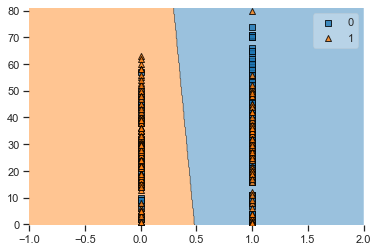

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_train),np.array(y_train),clf=log_reg)
plt.show()          

In [37]:
from sklearn.metrics import classification_report
print("Train Score Report")
print(classification_report(y_train,y_train_pred))
print("Test Score Report")
print(classification_report(y_test,y_test_pred))

Train Score Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       439
           1       0.74      0.67      0.71       273

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.78      0.79      0.78       712

Test Score Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



`titanic.train`のデータのなかで年齢の欠損値を埋め、ロジスティック回帰を用いたところ`Weightedavg`も`0.79`と意外にも精度が良かった。

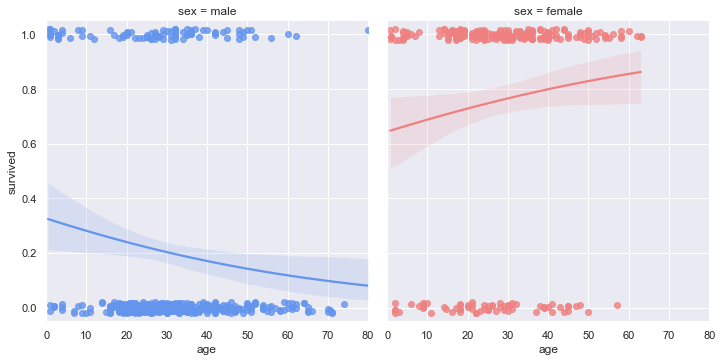

In [38]:
import seaborn as sns
import statsmodels.api

sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

## 課題の考察

　titanicデータセットのテストデータについては触れていないが、このモデルを基にkaggleに提出すれば実際の生存者との比較でモデルの性能が測れるらしい。上級者になった段階でチャレンジしてみたい。今回の課題に対して、「年齢」と「性別」で「生存者」を割り出すということを目標にただただロジスティック回帰分析したが、決定木ではないのだから、標準化すべきだったし、グリッドサーチでハイパーパラメータも調整すべきだったのかもしれない。決定境界の可視化も試みてはみたが、男性、女性の性別でただ単純にわかれるだけの散布図になってしまった。（当たり前だが、性別も0と1意外の数値しかないので、散布図書くなら、説明変数は`運賃`などを選ぶべきです。）ただ分類モデルの評価の際に、`classification_report`は便利でした。  
　最後に載せたのは`sns.load_dataset("titanic")`でタイタニックデータが呼び出せるらしい。それに対しての散布図である。これによると男性で30歳の生存率は20%だったらしい。ちなみに年齢と生存率には相関はないことは`corr`調べた段階でわかってました。

# ラビットチャレンジ/科目「機械学習」/「主成分分析」  

## 100文字以上で要点のまとめ  

・主成分分析(Principal Component Analysis: PCA)

　多変量データの持つ構造をより少数個の指標に圧縮する。  
　変量の個数を減らすことに伴う、情報の損失はなるべく小さくしたい  
　少数変数を利用した分析や可視化(2・3次元の場合)が実現可能  
 
　学習データ
$$ x_i = (x_{i1}, x_{i2}, \cdots, x_{im} )\in \mathbb{R}^m $$

　平均（ベクトル）
$$ \bar{x}= \frac{1}{n}\sum_{i=1}^n x_i$$

　データ行列
$$ \bar{X}=(x_1-\bar{x},\cdots,x_n-\bar{x})^T \in \mathbb{R}^{n×m} $$

　分散共分散行列
$$ \sum=Var(\bar{X})=\frac{1}{n}\bar{X}^T\bar{X} $$

　線形変換後のベクトル  
$$ s_j =(s_{1j},\cdots,s_{nj})^T=\bar{X}a_j　　a_j\in\mathbb{R}^m $$
　＊jは射影軸のインデックス  

　係数ベクトルが変われば線形変換後の値が変化  
　情報の量を分散の大きさと捉える  
　線形変換後の変数の分散が最大となる射影軸を探索  

・線形変換後の分散
$${a_j}^T Var(\bar{X})a_j$$

　以下の制約付き最適化問題を解く。
　$\lambda({a_j}^Ta_j - 1)$は、ノルムが1となるための制約条件である。制約を入れないと無限に解がある。

・ラグランジュ関数  
$$
E(a_{ij}) = {a_j}^T Var(\bar{X})a_j - \lambda({a_j}^Ta_j - 1)
$$ 

　ラグランジュ関数を最大にする係数ベクトルを探索（微分して0になる点）。  
　ラグランジュ関数を微分して最適解を求める。  
　元データの分散共分散行列の固有値・固有ベクトルが、上記の制約付き最適化問題の解となる。  

・寄与率  
　第k主成分の分散の全分散に対する割合(第k主成分が持つ情報量の割合)  
 　固有値$\div$固有値の合計
 
・累積寄与率
　第1-k主成分まで寄与率を大きい順に順次足したもの。

## 実装演習
・設定  
　乳がん検査データを利用しロジスティック回帰モデルを作成  
　主成分を利用し2次元空間上に次元圧縮  
・課題  
　32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認  

## 主成分分析

In [39]:
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()

In [40]:
import pandas as pd

df = pd.DataFrame(load_data.data,columns = load_data.feature_names)
df["y"] = load_data.target

print(len(df))
print(len(df.columns))
display(df.head())

569
31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


実装演習の課題は32次元のデータとなっているが、これは31次元データ（うち１つはy)なのでyを除いた30次元で進めていく。これを2次元上に次元圧縮していく。scikit-learnから読み込んだからかもしれない。標準化する。

In [41]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
sc = preprocessing.StandardScaler() 
X =df.iloc[:, 0:30]
X_norm=sc.fit_transform(X)

pca = PCA(random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(X_pc,columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: " , pca.n_components_)
print("保たれている情報: " , np.sum(pca.explained_variance_ratio_))
display(df_pca.head())

主成分の数:  30
保たれている情報:  1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


PCAを実行して、結果である主成分得点が表示された。ここから多く情報が詰まっているPC1とPC2を使って可視化していく。

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

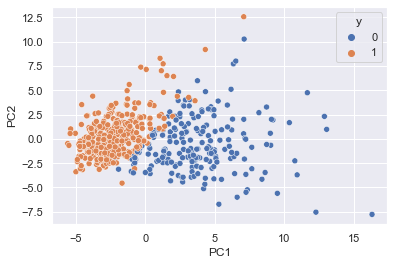

In [42]:
sns.scatterplot(x="PC1",y="PC2", data=df_pca,hue=df["y"])

これで30次元あったデータをうまく2次元で可視化できました。きちんと2つに分類できています。

In [43]:
y_all = pd.DataFrame(load_data["target"],columns=["target"])
y_all = y_all.replace({0:load_data["target_names"][0], 1:load_data["target_names"][1]})
y_all.head()

,target
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant


ここでyが何を表しているのかわからなくなったので確認。0が悪性、1が良性でした。
次に固有値の確認をする。

In [44]:
pd.DataFrame(np.round(pca.explained_variance_,2), index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))],columns=["固有値"])

,固有値
PC1,13.30
PC2,5.70
PC3,2.82
PC4,1.98
PC5,1.65
PC6,1.21
PC7,0.68
PC8,0.48
PC9,0.42
PC10,0.35


固有値のスクリーンプロットを作成。

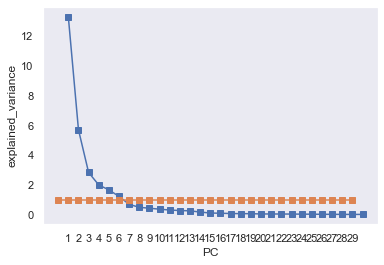

In [45]:
line = np.ones(30)
plt.plot(np.append(np.nan,pca.explained_variance_), "s-")
plt.plot(line,"s-")
plt.xlabel("PC")
plt.ylabel("explained_variance")
plt.xticks(np.arange(1, 30, 1))
plt.grid()
plt.show()

次に寄与率をみていく。

In [47]:
pd.DataFrame(np.round(pca.explained_variance_ratio_,2), index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))],columns=["寄与率"])

,寄与率
PC1,0.44
PC2,0.19
PC3,0.09
PC4,0.07
PC5,0.05
PC6,0.04
PC7,0.02
PC8,0.02
PC9,0.01
PC10,0.01


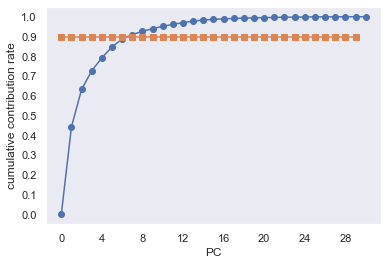

In [48]:
import matplotlib.ticker as ticker
line = np.full(30,0.9)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("PC")
plt.ylabel("cumulative contribution rate")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(line, "s-")
plt.grid()
plt.show()

累積寄与率が90%以上になるのはPC7ぐらいまで使うことになる。

## 課題の考察
主成分分析をする際、今回は標準化してみた。標準化しないでも試したみたが、PC1,PC2の可視化までは同じような散布図が描けた。ただ、固有値や寄与率に関していうと標準化しない場合には明らかに色々とおかしい数値が出てきた。ただ、標準化する場合にもそれ相応のデメリットもあるらしく今後は気をつけていきたい。課題の32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認することに関しては累積寄与率でPC2までだと63%となるため、37%の情報損失が発生してしまうため、PC7ぐらいまで用いることが望ましい。ただ、PC1,PC2で可視化することでバイプロットやコレスポンデンス分析を用いる際の理解が深まった。  

# ラビットチャレンジ
## 科目「機械学習」/「サポートベクターマシン」

・サポートベクトルマシン(SVM)  
　2クラス分類問題のために考案されていたが、回帰問題や教師なし問題などへも応用されている。  
 
・サポートベクトル(SV)分類  
　2クラス分類問題を他の問題用のSVMと区別する。  
  決定関数$f(x)=w^T{x}+b$でパラメータ$w","b"$を決定することは、適切な分類境界を決定することに対応している。 
　線形モデルの正負で２値に分類する。  
 
・マージン  
　決定関数と最も近いデータ点との距離  
 
・マージン最大化  
  マージンが最大化となる決定関数を求めること  
  
・サポートベクトル  
　分類境界に最も近いデータ$x_i$  
 
・ハードマージン  
　訓練データを完璧に分類できる決定関数が存在すると仮定したSV分類  

・ソフトマージン  
　ハードマージンの仮定が強すぎるため、この仮定をなくし、SV分類を分類可能でないデータに適用できるように拡張したもの。(制約条件を緩和）  

この際、ハードマージンの制約条件の右辺に非負の整数を導入するがこれをスラック変数と呼ぶ。スラック変数はマージン内に入るデータや誤分類されたデータに対する誤差を表す変数である。  
 
・主問題   
　SVMの最適化問題のこと。一般的にSVMの分類では、この主問題と等価な双対問題を解くことで結果を導出する。  

・カーネルトリック  
　SVMを非線形分離に拡張する手法  

## 実装演習
・設定  
　乳がん検査データを利用し線形SVM回帰,カーネルSVMモデルを作成  
・問題
　上記設定の決定境界を可視化する。

## SVM

分類結果をSVMで可視化することが目標なので説明変数を２カラムに絞る。

In [51]:
tg_df = df[["mean radius","mean texture","y"]]
from sklearn.model_selection import train_test_split
X =tg_df[["mean radius","mean texture"]]
y=tg_df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

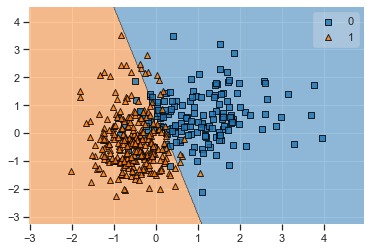

In [53]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(random_state=0).fit(X_train_scaled,y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=linear_svm)
plt.show()

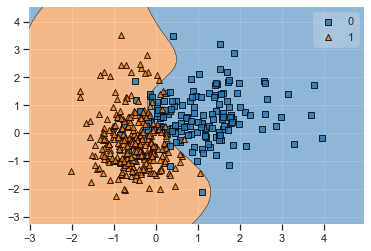

In [56]:
from sklearn.svm import SVC
kernel_svm =SVC(kernel="rbf",random_state=0).fit(X_train_scaled,y_train)
plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kernel_svm)
plt.show()

線形SVM,非線形SVMで決定境界を作成できた。次にロジスティック回帰,k近傍法で作成する。

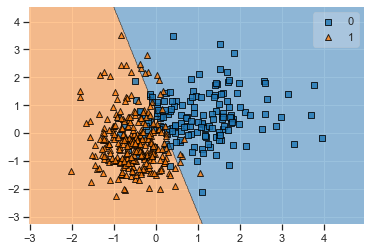

In [59]:
# ロジスティック回帰
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=log_reg)
plt.show()

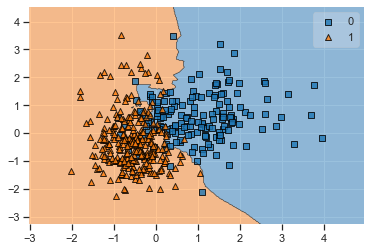

In [62]:
#k近傍法
from sklearn.neighbors import KNeighborsClassifier
kn_cls =KNeighborsClassifier(n_neighbors=5,p=2).fit(X_train_scaled,y_train)
plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kn_cls)
plt.show()

## 課題の考察

ロジスティック回帰と線形SVMは似ている。比較した際にSVMの方がデータの外れ値の影響を受けていない。これがSVMの利点かと思われる。
線形分離できないデータの分類の際には、カーネルSVMが有効であることもわかった。SVMの精度はCやgammaなどのハイパーパラメータチューニングに大きく依存するとのことなので、色々試していく必要がある。k近傍法は計算コストが高く予測を出すのに一番時間がかかった。ただ、モデルの解釈が非常に容易だというメリットもある。